# Gaussian Mixture Model for Ethereum Fraud Detection
This notebook demonstrates unsupervised learning using Gaussian Mixture Models (GMM) to detect potential fraudulent patterns in Ethereum transactions.

GMM is particularly useful for fraud detection because:
1. It provides a probabilistic approach to clustering
2. It can model complex data distributions with multiple components
3. It assigns probability scores that can be used for anomaly detection
4. It can find elliptical clusters of different sizes and orientations

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
# Load the dataset
data_path = '../Data/address_data_combined.csv'
df = pd.read_csv(data_path)
print(f'Dataset loaded, shape: {df.shape}')

# Display the first few rows and column information
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

print("\nSummary statistics:")
display(df.describe())

Dataset loaded, shape: (14155, 14)

First 5 rows of the dataset:


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               14155 non-null  object 
 1   FLAG                                                  14155 non-null  int64  
 2   Avg min between sent tnx                              14155 non-null  float64
 3   Avg min between received tnx                          14155 non-null  float64
 4   Time Diff between first and last (Mins)               14155 non-null  float64
 5   Unique Received From Addresses                        14155 non-null  int64  
 6   min value received                                    14155 non-null  float64
 7   max value received                                    14155 non-null  float64
 8   avg val received                  

None


Summary statistics:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
count,14155.000000,1.415500e+04,14155.000000,1.415500e+04,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,1.415500e+04,1.415500e+04
mean,0.460473,8.118597e+03,7020.946759,1.901450e+05,28.484422,34.249649,376.353259,75.994578,5.690614,35.796158,214.417096,8.113586e+03,1.016392e+03
std,0.498453,4.291410e+04,23506.649412,3.234800e+05,268.059421,356.729056,10853.726198,2417.913485,134.496880,239.333107,1144.652196,3.037182e+05,2.021339e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.560535e+07
25%,0.000000,0.000000e+00,0.000000,7.335500e+01,1.000000,0.000000,0.340448,0.135969,0.000000,0.000328,3.000000,7.347425e-01,0.000000e+00
50%,0.000000,2.398000e+01,185.420000,2.093200e+04,2.000000,0.030000,3.000000,1.000000,0.009000,1.029530,8.000000,1.306701e+01,1.491000e-03
75%,1.000000,1.512990e+03,3594.655000,2.353702e+05,6.000000,0.954314,30.219703,7.995038,0.854173,10.134141,44.000000,1.010000e+02,1.760323e-02
max,1.000000,1.461535e+06,517161.100000,2.837470e+06,9999.000000,25533.614329,800000.000000,283618.831600,12000.000000,12766.806954,19995.000000,2.858159e+07,1.428864e+07


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0])

# Handle missing values (fill with medians for numerical columns since they might have outliers)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Check if any known fraud labels exist in the dataset
if 'FLAG' in df.columns or 'is_fraud' in df.columns or 'label' in df.columns:
    label_col = 'FLAG' if 'FLAG' in df.columns else ('is_fraud' if 'is_fraud' in df.columns else 'label')
    print(f"\nFraud label distribution:\n{df[label_col].value_counts()}")

Missing values per column:


Series([], dtype: int64)


Fraud label distribution:
FLAG
0    7637
1    6518
Name: count, dtype: int64


In [12]:
# Select features for clustering
feature_df = df.select_dtypes(include=['float64', 'int64'])

# Drop label column if it exists - we're doing unsupervised learning
cols_to_drop = []
if 'FLAG' in feature_df.columns:
    cols_to_drop.append('FLAG')
if 'is_fraud' in feature_df.columns:
    cols_to_drop.append('is_fraud')
if 'label' in feature_df.columns:
    cols_to_drop.append('label')
    
# Also drop any identifier columns that shouldn't be part of clustering
if 'address' in feature_df.columns:
    cols_to_drop.append('address')
if 'Address' in feature_df.columns:
    cols_to_drop.append('Address')
if 'time' in feature_df.columns:
    cols_to_drop.append('time')
if 'timestamp' in feature_df.columns:
    cols_to_drop.append('timestamp')
if 'block_number' in feature_df.columns:
    cols_to_drop.append('block_number')

feature_df = feature_df.drop(columns=cols_to_drop, errors='ignore')

print(f"Selected {feature_df.shape[1]} features for clustering")
print("Features used:", feature_df.columns.tolist())

Selected 12 features for clustering
Features used: ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Unique Received From Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'avg val sent', 'total transactions (including tnx to create contract', 'total ether received', 'total ether balance']


In [13]:
# Handle extreme outliers by capping values
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_percentile)
        upper = df_capped[col].quantile(upper_percentile)
        df_capped.loc[df_capped[col] < lower, col] = lower
        df_capped.loc[df_capped[col] > upper, col] = upper
    return df_capped

# Cap extreme outliers to improve clustering
feature_df = cap_outliers(feature_df, feature_df.columns)
print("Capped extreme outliers")

# Normalize the features - RobustScaler is less sensitive to outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(feature_df)

# Apply PCA for visualization and dimensionality reduction if needed
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Variance explained by 2 PCA components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Capped extreme outliers
Variance explained by 2 PCA components: 99.99%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10544\3038873652.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '410.4599999999991' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10544\3038873652.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9679.279999999766' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper


In [14]:
# We'll use a random sample if the dataset is very large
MAX_SAMPLES = 10000
if X_scaled.shape[0] > MAX_SAMPLES:
    print(f"Dataset is large ({X_scaled.shape[0]} rows). Using {MAX_SAMPLES} random samples for model training.")
    sample_indices = np.random.choice(X_scaled.shape[0], size=MAX_SAMPLES, replace=False)
    X_sample = X_scaled[sample_indices]
else:
    X_sample = X_scaled
    sample_indices = np.arange(X_scaled.shape[0])

Dataset is large (14155 rows). Using 10000 random samples for model training.


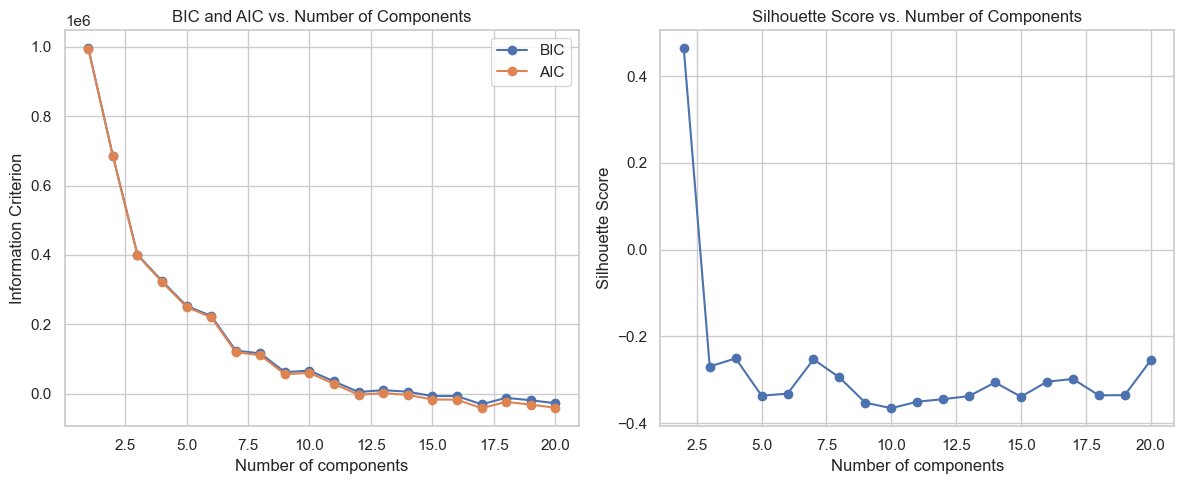

Optimal number of components based on BIC: 17
Optimal number of components based on AIC: 17
Optimal number of components based on Silhouette score: 2


In [15]:
# Determine the optimal number of components using BIC and AIC
n_components_range = range(1, 21)
bic = []
aic = []
silhouette_scores = []

for n_components in n_components_range:
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, 
                          covariance_type='full', 
                          random_state=42,
                          max_iter=100,
                          n_init=10)
    gmm.fit(X_sample)
    
    # Calculate BIC and AIC
    bic.append(gmm.bic(X_sample))
    aic.append(gmm.aic(X_sample))
    
    # For silhouette score, we need to get the cluster predictions
    if n_components > 1:  # Silhouette score needs at least 2 clusters
        labels = gmm.predict(X_sample)
        silhouette_scores.append(silhouette_score(X_sample, labels))
    else:
        silhouette_scores.append(0)  # Placeholder for n_components=1

# Plot BIC and AIC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic, 'o-', label='BIC')
plt.plot(n_components_range, aic, 'o-', label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC and AIC vs. Number of Components')
plt.legend()

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(n_components_range[1:], silhouette_scores[1:], 'o-')
plt.xlabel('Number of components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Components')
plt.tight_layout()
plt.show()

# Find the optimal number of components based on BIC (lower is better)
optimal_n_components_bic = n_components_range[np.argmin(bic)]
print(f"Optimal number of components based on BIC: {optimal_n_components_bic}")

# Find the optimal number of components based on AIC (lower is better)
optimal_n_components_aic = n_components_range[np.argmin(aic)]
print(f"Optimal number of components based on AIC: {optimal_n_components_aic}")

# Find the optimal number of components based on Silhouette score (higher is better)
optimal_n_components_silhouette = n_components_range[np.argmax(silhouette_scores)]
print(f"Optimal number of components based on Silhouette score: {optimal_n_components_silhouette}")

In [16]:
# Choose the optimal number of components (we'll use BIC which is generally more conservative)
n_components = optimal_n_components_bic
print(f"Using {n_components} components for the final model")

# Train the final GMM
gmm = GaussianMixture(n_components=n_components, 
                      covariance_type='full', 
                      random_state=42,
                      max_iter=500,
                      n_init=10)
gmm.fit(X_sample)

# Get cluster assignments
cluster_labels = gmm.predict(X_sample)

# Get probability scores - useful for anomaly detection
probabilities = gmm.predict_proba(X_sample)
# Maximum probability of belonging to any cluster - low values could indicate outliers/anomalies
max_probabilities = np.max(probabilities, axis=1)

# Count the number of samples in each cluster
cluster_counts = np.bincount(cluster_labels)
print(f"\nNumber of samples in each cluster:")
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} samples")

Using 17 components for the final model

Number of samples in each cluster:
Cluster 0: 895 samples
Cluster 1: 264 samples
Cluster 2: 431 samples
Cluster 3: 11 samples
Cluster 4: 1328 samples
Cluster 5: 543 samples
Cluster 6: 31 samples
Cluster 7: 366 samples
Cluster 8: 614 samples
Cluster 9: 402 samples
Cluster 10: 758 samples
Cluster 11: 683 samples
Cluster 12: 744 samples
Cluster 13: 446 samples
Cluster 14: 446 samples
Cluster 15: 773 samples
Cluster 16: 1265 samples


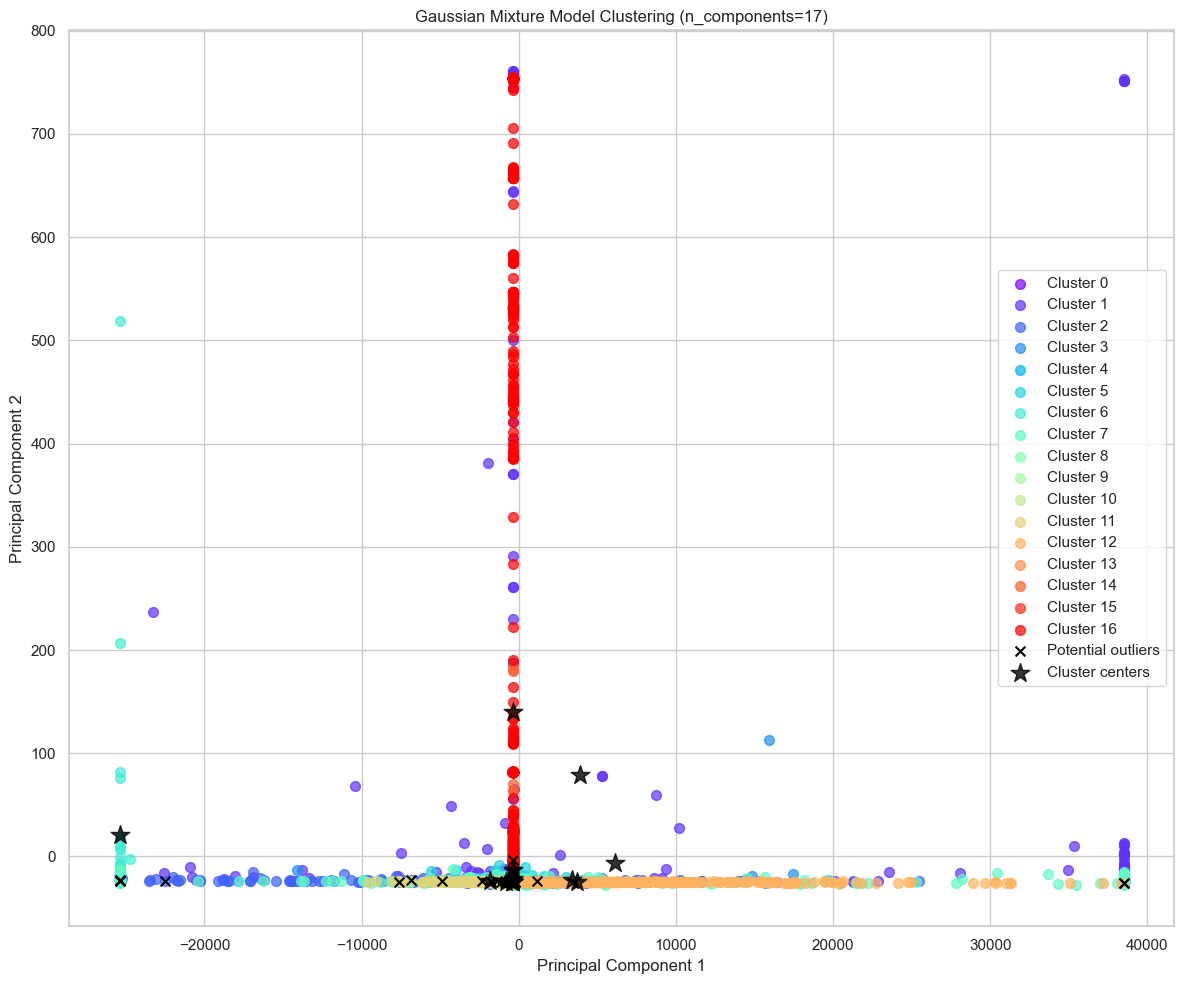

In [17]:
# Apply PCA to the same sample used for GMM for visualization
pca_sample = PCA(n_components=2)
X_pca_sample = pca_sample.fit_transform(X_sample)

# Visualize the clusters in 2D using PCA
plt.figure(figsize=(12, 10))

# Create a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, n_components))

# Plot each cluster
for i in range(n_components):
    idx = (cluster_labels == i)
    plt.scatter(X_pca_sample[idx, 0], X_pca_sample[idx, 1], s=50, color=colors[i], alpha=0.7, label=f'Cluster {i}')

# Plot potential outliers (points with low probability of belonging to any cluster)
outlier_threshold = 0.7  # This is a hyperparameter that can be tuned
outliers = max_probabilities < outlier_threshold
plt.scatter(X_pca_sample[outliers, 0], X_pca_sample[outliers, 1], s=50, color='black', marker='x', alpha=1, label='Potential outliers')

# Plot cluster centers
centers = pca_sample.transform(gmm.means_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='black', alpha=0.8, label='Cluster centers')

plt.title(f'Gaussian Mixture Model Clustering (n_components={n_components})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cluster sizes:


,cluster,count
0,0,895
1,1,264
2,2,431
3,3,11
4,4,1328
5,5,543
6,6,31
7,7,366
8,8,614
9,9,402


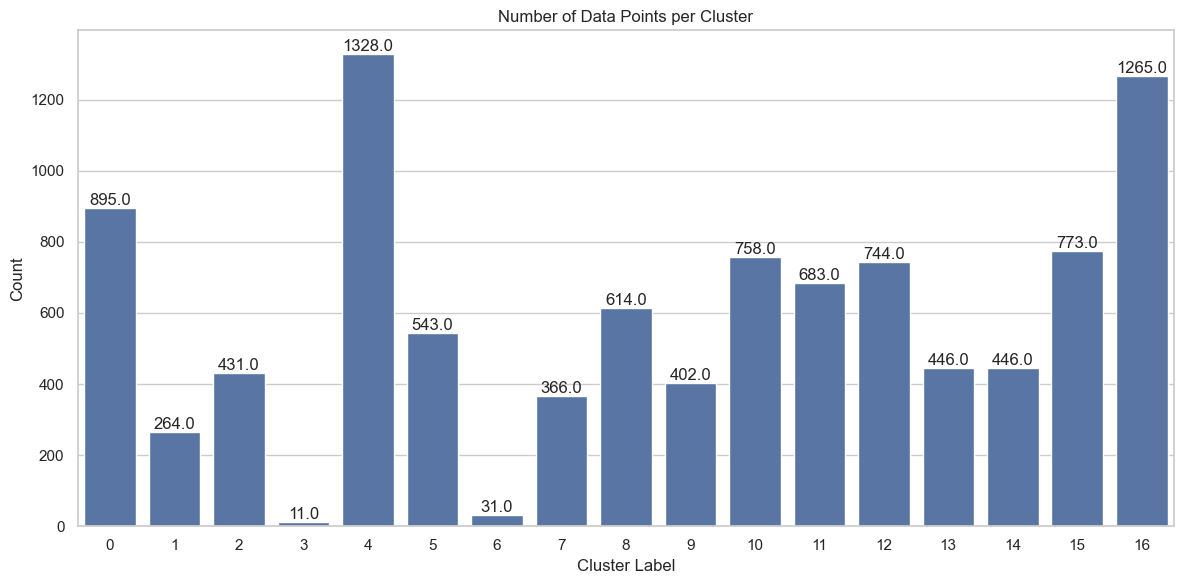

In [18]:
# Add the cluster assignments and probability scores back to the original dataframe
sampled_df = df.iloc[sample_indices].copy()
sampled_df['cluster'] = cluster_labels
sampled_df['max_probability'] = max_probabilities

# Mark potential outliers based on the probability threshold
outlier_threshold = 0.7  # Same threshold used for visualization
sampled_df['is_outlier'] = sampled_df['max_probability'] < outlier_threshold

# Cluster statistics
cluster_stats = sampled_df.groupby('cluster').size().reset_index(name='count')
print("Cluster sizes:")
display(cluster_stats)

# Plot cluster sizes
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='cluster', y='count', data=cluster_stats)
plt.title('Number of Data Points per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()


Fraud ratio by cluster:


,cluster,fraud_ratio
4,4,1.000000
13,13,0.937220
0,0,0.781006
8,8,0.584691
11,11,0.499268
14,14,0.439462
6,6,0.419355
5,5,0.377532
1,1,0.363636
15,15,0.323415


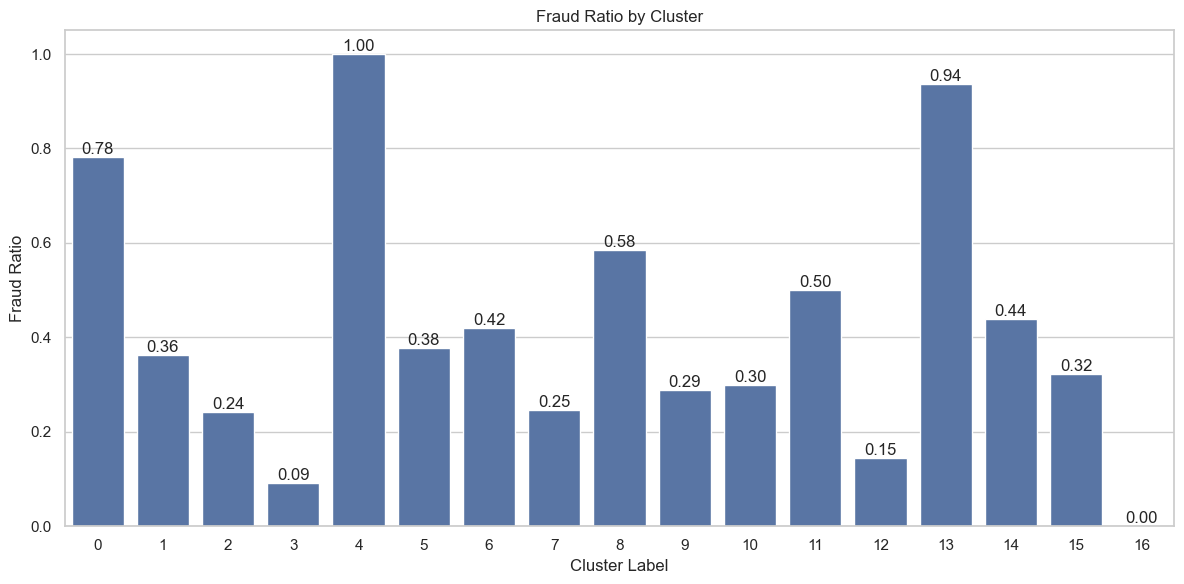


Fraud ratio in outliers: 0.6139
Fraud ratio in normal points: 0.4526
Outliers show higher fraud ratio, suggesting GMM is effectively identifying anomalies


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10544\4175113018.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_prob = sampled_df.groupby('prob_bin')[label_col].mean().reset_index()


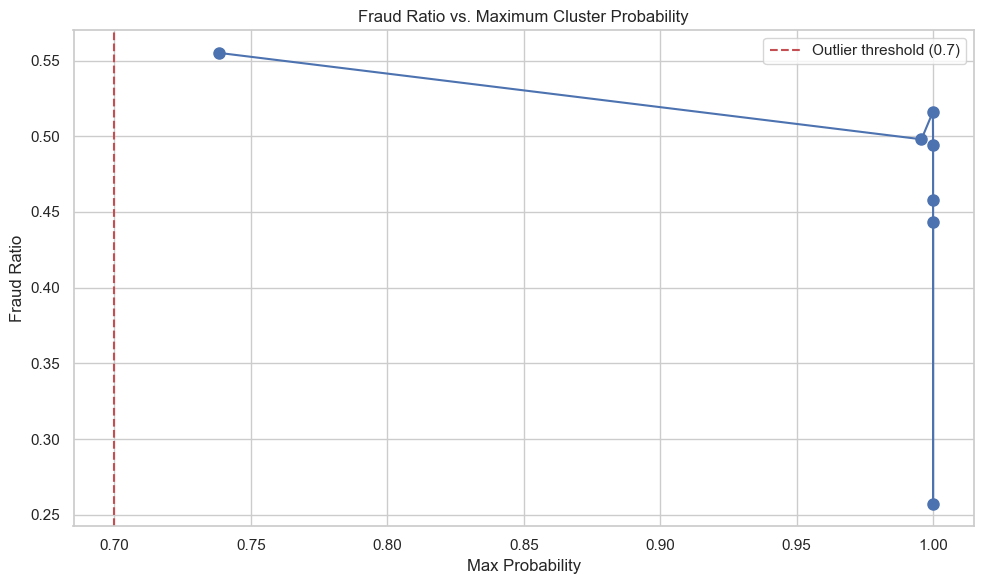

In [19]:
# If fraud labels exist, analyze the relationship between clusters and fraud
if 'FLAG' in sampled_df.columns or 'is_fraud' in sampled_df.columns or 'label' in sampled_df.columns:
    label_col = 'FLAG' if 'FLAG' in sampled_df.columns else ('is_fraud' if 'is_fraud' in sampled_df.columns else 'label')
    
    # Calculate fraud percentage by cluster
    fraud_by_cluster = sampled_df.groupby('cluster')[label_col].mean().reset_index()
    fraud_by_cluster.columns = ['cluster', 'fraud_ratio']
    
    print("\nFraud ratio by cluster:")
    display(fraud_by_cluster.sort_values('fraud_ratio', ascending=False))
    
    # Visualize fraud distribution
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='cluster', y='fraud_ratio', data=fraud_by_cluster)
    plt.title('Fraud Ratio by Cluster')
    plt.xlabel('Cluster Label')
    plt.ylabel('Fraud Ratio')
    # Add ratio labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom')
    plt.tight_layout()
    plt.show()
    
    # Check if outliers have higher fraud ratio
    outlier_fraud_ratio = sampled_df[sampled_df['is_outlier']][label_col].mean()
    normal_fraud_ratio = sampled_df[~sampled_df['is_outlier']][label_col].mean()
    print(f"\nFraud ratio in outliers: {outlier_fraud_ratio:.4f}")
    print(f"Fraud ratio in normal points: {normal_fraud_ratio:.4f}")
    if outlier_fraud_ratio > normal_fraud_ratio:
        print("Outliers show higher fraud ratio, suggesting GMM is effectively identifying anomalies")
    else:
        print("Fraud appears distributed across clusters rather than concentrated in outliers")
        
    # Plot fraud ratio against max probability (to identify probability threshold)
    plt.figure(figsize=(10, 6))
    
    # Create probability bins
    num_bins = 10
    sampled_df['prob_bin'] = pd.qcut(sampled_df['max_probability'], q=num_bins, duplicates='drop')
    
    # Calculate fraud ratio per bin
    fraud_by_prob = sampled_df.groupby('prob_bin')[label_col].mean().reset_index()
    fraud_by_prob['bin_mid'] = fraud_by_prob['prob_bin'].apply(lambda x: x.mid)  # Get midpoint of interval
    
    # Plot
    plt.plot(fraud_by_prob['bin_mid'], fraud_by_prob[label_col], 'o-', markersize=8)
    plt.axvline(x=outlier_threshold, color='r', linestyle='--', label=f'Outlier threshold ({outlier_threshold})')
    plt.xlabel('Max Probability')
    plt.ylabel('Fraud Ratio')
    plt.title('Fraud Ratio vs. Maximum Cluster Probability')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Feature means by cluster:


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
cluster,,,,,,,,,,,,
0,17287.259173,1058.338324,43118.828726,4.056983,0.377205,1.780954,0.885089,2.969631,3.165680,6.367598,3.712386,0.001947
1,16038.928220,4488.136742,328207.481856,194.109848,492.630160,4438.901749,749.007976,166.435782,497.549628,1521.909091,267721.966358,78927.918972
2,4119.461508,12368.354130,527319.451137,11.498840,0.142000,124.392275,22.044009,0.104116,13.385280,145.415313,617.975515,-48.272860
3,4977.268182,3459.272727,663941.675455,127.272727,9.276267,1291.600798,215.127743,1.524545,212.565384,1319.818182,696930.531323,114.919073
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,42693.310792,25780.534494,337014.883352,3.287293,1.476020,9.288147,4.272912,0.960500,3.691539,12.394107,19.590504,0.349035
6,3013.786774,1219.441290,368317.799032,60.516129,30.401228,4812.885278,427.132803,1.064937,205.191614,2110.709677,210239.019638,-70421.451014
7,361.910301,896.695301,564411.945301,478.213115,0.024195,2262.436233,12.940659,0.091522,11.248888,3257.393443,25426.621538,16398.442470
8,16895.417362,22674.270814,348691.743746,7.618893,0.028998,0.700367,0.215966,0.000780,0.153612,30.741042,2.064808,-0.068922


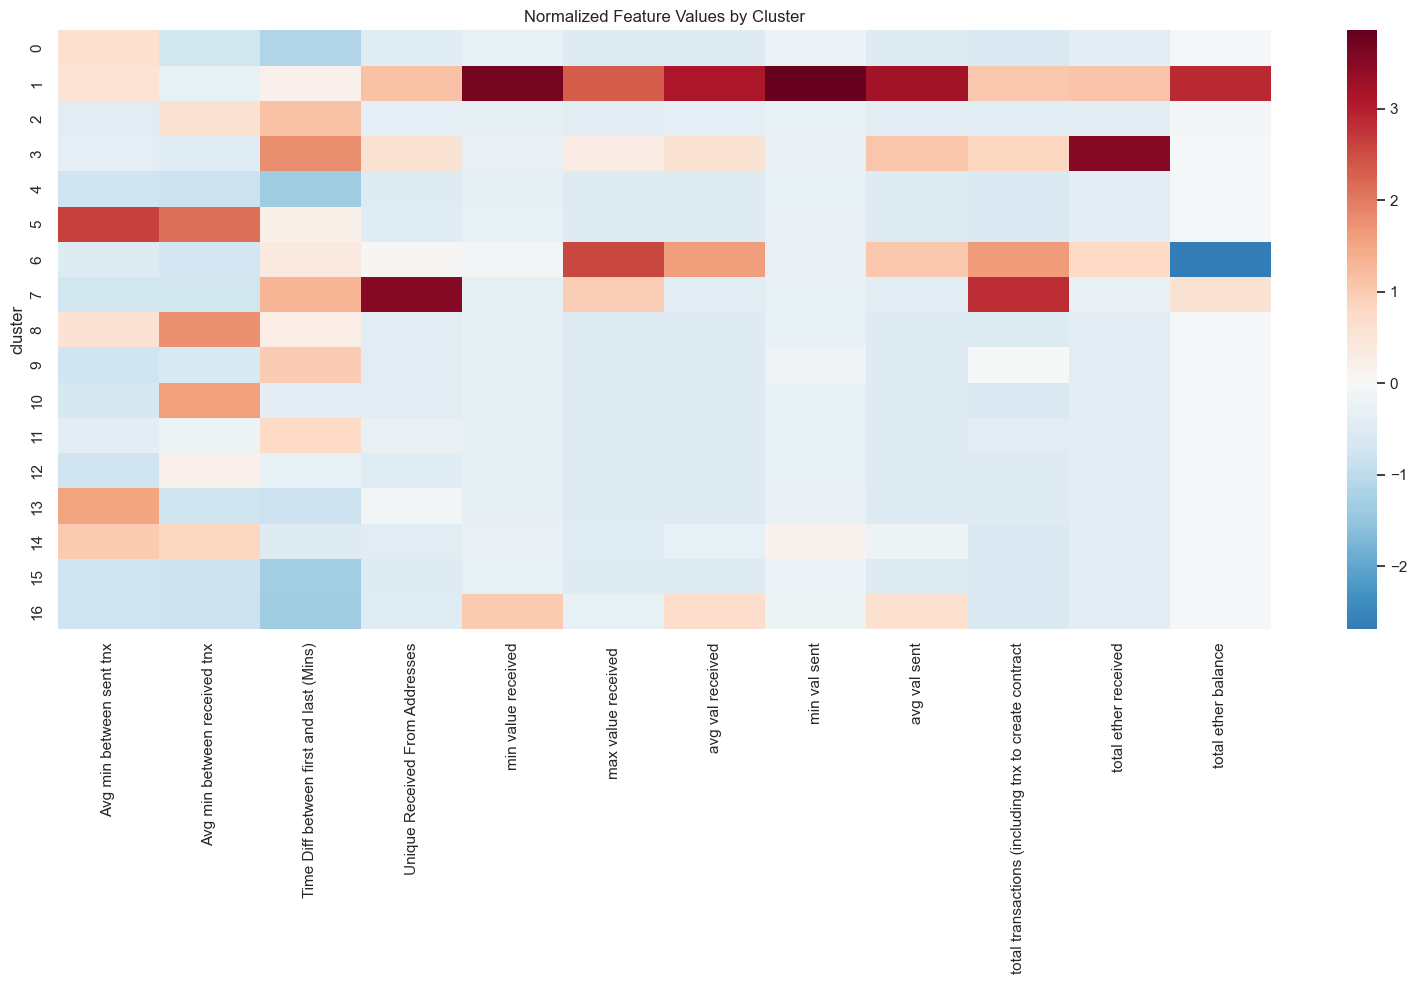

In [20]:
# Analyze the features of each cluster to understand their characteristics
# Calculate mean of each feature by cluster
feature_cols = feature_df.columns
cluster_means = sampled_df.groupby('cluster')[feature_cols].mean()

print("Feature means by cluster:")
display(cluster_means)

# Find most distinguishing features for each cluster
# Normalize the means for comparison
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Heatmap of cluster characteristics
plt.figure(figsize=(16, 10))
sns.heatmap(cluster_means_normalized, cmap='RdBu_r', center=0, annot=False)
plt.title('Normalized Feature Values by Cluster')
plt.tight_layout()
plt.show()

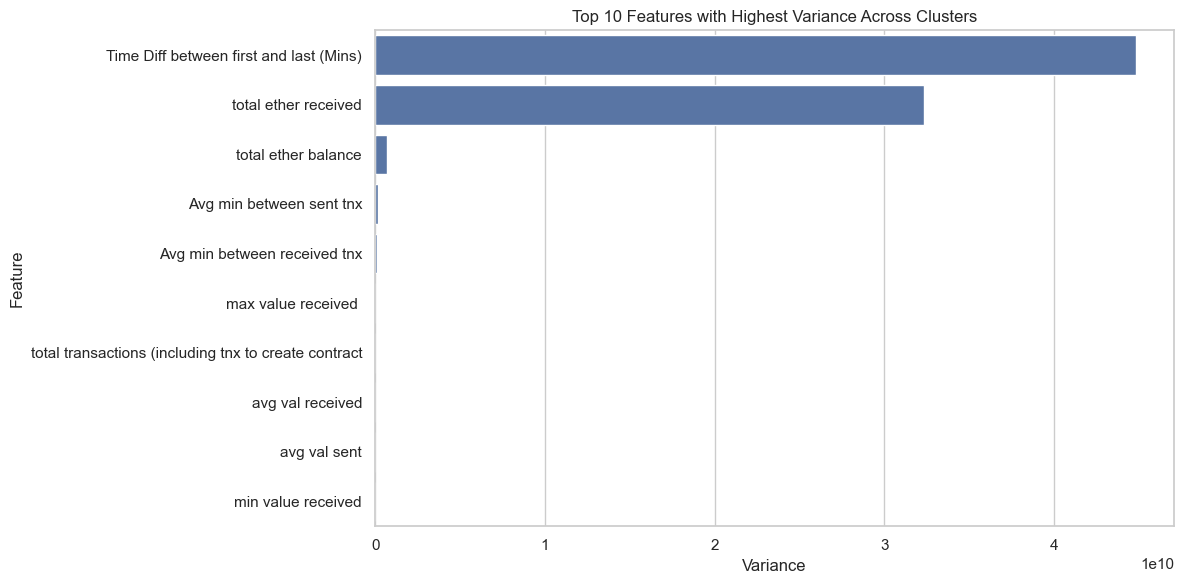

In [21]:
# Feature Importance Analysis
# We'll analyze which features are most important for differentiating between clusters

# Calculate variance explained by each feature across clusters
feature_variance = cluster_means.var()
feature_importance = pd.DataFrame({'Feature': feature_variance.index, 'Variance': feature_variance.values})
feature_importance = feature_importance.sort_values('Variance', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Variance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features with Highest Variance Across Clusters')
plt.tight_layout()
plt.show()

In [22]:
# Identify high risk clusters based on fraud ratio (if fraud labels are available)
if 'FLAG' in sampled_df.columns or 'is_fraud' in sampled_df.columns or 'label' in sampled_df.columns:
    fraud_threshold = 0.6  # Clusters with fraud ratio above this are considered high risk
    high_risk_clusters = fraud_by_cluster[fraud_by_cluster['fraud_ratio'] > fraud_threshold]['cluster'].tolist()
    
    if high_risk_clusters:
        print(f"High risk clusters: {high_risk_clusters}")
        # Combine high risk clusters and outliers as potential fraud cases
        potential_fraud = sampled_df[(sampled_df['cluster'].isin(high_risk_clusters)) | (sampled_df['is_outlier'])]
    else:
        print("No high risk clusters found. Using only outliers as potential fraud cases.")
        potential_fraud = sampled_df[sampled_df['is_outlier']]
else:
    # If no fraud labels are available, just use the outliers
    potential_fraud = sampled_df[sampled_df['is_outlier']]

print(f"\nNumber of potential fraud cases identified: {len(potential_fraud)}")

# If we have fraud labels, we can check how many actual frauds were identified
if 'FLAG' in df.columns or 'is_fraud' in df.columns or 'label' in df.columns:
    label_col = 'FLAG' if 'FLAG' in df.columns else ('is_fraud' if 'is_fraud' in df.columns else 'label')
    actual_fraud_count = potential_fraud[label_col].sum()
    total_fraud_count_in_sample = sampled_df[label_col].sum()
    print(f"Actual frauds identified: {actual_fraud_count} out of {total_fraud_count_in_sample} total frauds in sample")
    print(f"Detection rate: {actual_fraud_count/total_fraud_count_in_sample*100:.2f}%")
    print(f"Precision: {actual_fraud_count/len(potential_fraud)*100:.2f}%")

print("\nSample of potential fraud cases identified by GMM:")
display(potential_fraud.head(10))

High risk clusters: [0, 4, 13]

Number of potential fraud cases identified: 2796
Actual frauds identified: 2517 out of 4551 total frauds in sample
Detection rate: 55.31%
Precision: 90.02%

Sample of potential fraud cases identified by GMM:


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance,cluster,max_probability,is_outlier,prob_bin
1919,0x172f432f0e79cb5abb0f0f9c558425edf41e9595,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,4,1.000000,False,"(0.9999999999999, 1.0]"
8597,0x71ca815814e491afa25940403b2616f34e172711,0,8775.85,0.00,52655.12,1,0.425909,0.425909,0.425909,0.002516,0.070486,7,0.425909,0.002996,0,0.999945,False,"(0.9998466080349, 0.999997723344]"
753,0x9c2b4a4094ff0f86bc1a11e1a50f4fce32e03169,1,419.35,238.13,106210.53,3,0.005194,0.120000,0.084073,0.000000,0.000092,255,0.336294,0.313118,9,0.629689,True,"(0.4853296643185, 0.9916370570313]"
4082,0xd787fcafb49fc1b41042a825f97e2dec5f28369f,1,11857.80,0.00,11857.80,1,0.700000,0.700000,0.700000,0.699559,0.699559,2,0.700000,0.000441,0,1.000000,False,"(0.9999999669833, 0.9999999998956]"
12510,0x3c924cbbd8ffb34b3da99c1501afb9bb3cf5e4f4,1,0.00,10.68,8585.20,16,0.014569,2.180014,0.462987,7.406738,7.406738,17,7.407788,0.001050,0,0.999998,False,"(0.9998466080349, 0.999997723344]"
384,0x1792e2914b2ba25b507ba11aa7e4d1c0a99bb20e,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,4,1.000000,False,"(0.9999999999999, 1.0]"
1205,0x1b3e3c78849d80688172bf9ced8c9c2407f988e4,1,276.83,70.44,7084.70,55,0.000000,3.000000,0.691771,1.000000,8.877243,83,53.266358,0.002898,13,1.000000,False,"(0.9999999999999, 1.0]"
12224,0x1b6b664b91081b34ca8c7cdf22618e6a547d7947,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,4,1.000000,False,"(0.9999999999999, 1.0]"
2871,0xb8f2b53063ded859a3fdb96d43dd3d37253f47bf,1,1099.87,0.00,8798.97,1,1.257296,1.257296,1.257296,0.000000,0.154955,9,1.257296,0.017655,5,0.522599,True,"(0.4853296643185, 0.9916370570313]"
354,0x456c3dacfd9dd7e0c5caf2348a0afbfb60231075,1,2072.66,875.26,52144.57,36,0.040000,0.500000,0.101109,0.014250,0.619891,50,4.347690,0.008456,13,0.999997,False,"(0.9998466080349, 0.999997723344]"


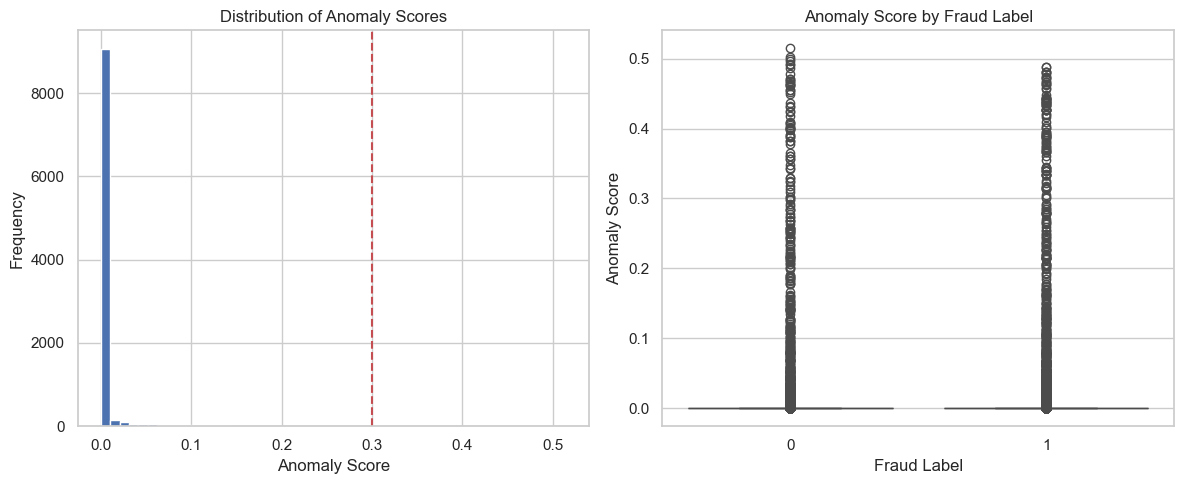

In [23]:
# Create anomaly score based on probability
sampled_df['anomaly_score'] = 1 - sampled_df['max_probability']

# Plot distribution of anomaly scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(sampled_df['anomaly_score'], bins=50)
plt.axvline(x=1-outlier_threshold, color='r', linestyle='--')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')

# Plot anomaly score vs fraud label if available
if 'FLAG' in sampled_df.columns or 'is_fraud' in sampled_df.columns or 'label' in sampled_df.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x=label_col, y='anomaly_score', data=sampled_df)
    plt.xlabel('Fraud Label')
    plt.ylabel('Anomaly Score')
    plt.title('Anomaly Score by Fraud Label')

plt.tight_layout()
plt.show()

Number of outliers in test set: 39 (1.38%)

Fraud ratio in test outliers: 0.6154
Fraud ratio in test normal points: 0.4588


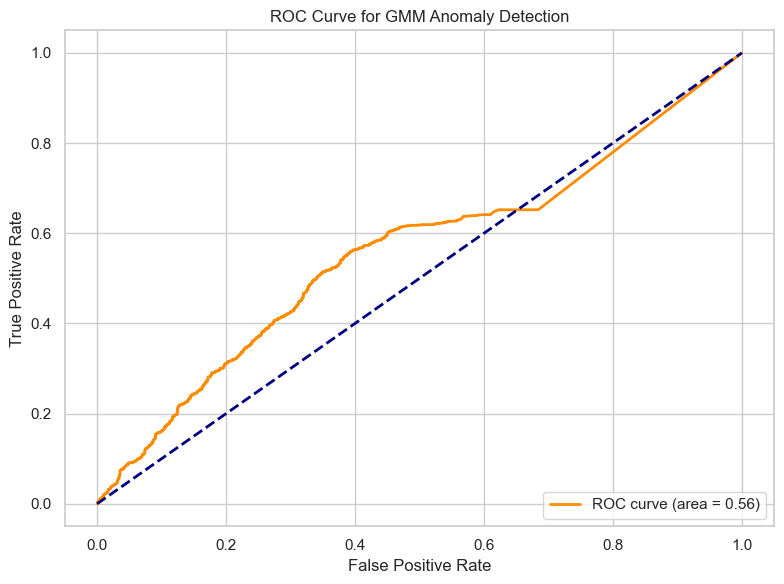


AUC score for fraud detection: 0.5577


In [24]:
# Use the trained GMM to predict on new data (demonstrating generalization)
# We'll use a holdout sample for demonstration
train_indices, test_indices = train_test_split(np.arange(len(X_scaled)), test_size=0.2, random_state=42)
X_test = X_scaled[test_indices]

# Get cluster predictions and probabilities
test_labels = gmm.predict(X_test)
test_probabilities = gmm.predict_proba(X_test)
test_max_probabilities = np.max(test_probabilities, axis=1)
test_anomaly_scores = 1 - test_max_probabilities

# Create test dataframe with results
test_df = df.iloc[test_indices].copy()
test_df['cluster'] = test_labels
test_df['max_probability'] = test_max_probabilities
test_df['anomaly_score'] = test_anomaly_scores
test_df['is_outlier'] = test_df['max_probability'] < outlier_threshold

# Check if the model generalizes well to the test set
print(f"Number of outliers in test set: {test_df['is_outlier'].sum()} ({test_df['is_outlier'].mean()*100:.2f}%)")

# If fraud labels exist, check how well our model identifies them in test set
if 'FLAG' in test_df.columns or 'is_fraud' in test_df.columns or 'label' in test_df.columns:
    # Outliers
    test_outlier_fraud_ratio = test_df[test_df['is_outlier']][label_col].mean()
    test_normal_fraud_ratio = test_df[~test_df['is_outlier']][label_col].mean()
    
    print(f"\nFraud ratio in test outliers: {test_outlier_fraud_ratio:.4f}")
    print(f"Fraud ratio in test normal points: {test_normal_fraud_ratio:.4f}")
    
    # Plot ROC curve for anomaly score
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(test_df[label_col], test_df['anomaly_score'])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for GMM Anomaly Detection')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    print(f"\nAUC score for fraud detection: {roc_auc:.4f}")

## Conclusions and Recommendations

### Gaussian Mixture Model Results
1. The GMM algorithm identified distinct clusters in the Ethereum transaction data, representing different behavioral patterns
2. Transactions with low probability of belonging to any cluster are considered outliers and potential fraud cases
3. The model provides a probabilistic approach to anomaly detection, giving an anomaly score for each transaction

### Fraud Detection Insights
1. GMM's probabilistic nature makes it well-suited for fraud detection, as it can identify transactions that don't fit well into any normal behavior pattern
2. Combining cluster information with probability scores provides a powerful approach for identifying suspicious transactions
3. Some clusters have significantly higher fraud ratios, indicating that certain transaction patterns are more associated with fraudulent activity

### Next Steps
1. Fine-tune the probability threshold for outlier detection based on the organization's risk tolerance
2. Implement a real-time scoring system using the trained GMM model to flag suspicious new transactions
3. Combine GMM results with other machine learning models (supervised and unsupervised) for a comprehensive fraud detection system